In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.__version__ 

'2.7.0'

In [ ]:
import os
import numpy as np
import random
os.environ['TF_DETERMINISTIC_OPS'] ='1'
os.environ['TF_CUDNN_DETERMINISTIC']='1'
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)
SEED=1
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 1. 資料準備

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [ ]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [ ]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]

# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dense,Activation
from tensorflow.keras.layers import Dropout,BatchNormalization, Flatten

In [ ]:
from tensorflow.keras.regularizers import l2
reg=l2(0.002)

In [ ]:
def block(p_bname,p_filters,p_conv):
  for i in range(p_conv):
    model.add(Conv2D(filters=p_filters,kernel_size=(3,3),
            activation='relu',padding='same',kernel_regularizer=reg,
            bias_regularizer=reg,name=p_bname+'_conv'+str(i)))
  model.add(MaxPooling2D(pool_size=(2, 2),name=p_bname+'_pool'))  

In [ ]:
model = Sequential()
model.add(Input(shape=(32, 32,3)))
block(p_bname='B1',p_filters=32,p_conv=2)
block(p_bname='B2',p_filters=64,p_conv=2)
block(p_bname='B3',p_filters=128,p_conv=2)
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_regularizer=reg,bias_regularizer=reg))
model.add(Dense(10,activation='softmax',kernel_regularizer=reg,bias_regularizer=reg))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 B1_conv0 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 B1_conv1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 B1_pool (MaxPooling2D)      (None, 16, 16, 32)        0         
                                                                 
 B2_conv0 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 B2_conv1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 B2_pool (MaxPooling2D)      (None, 8, 8, 64)          0         
                                                                 
 B3_conv0 (Conv2D)           (None, 8, 8, 128)         7

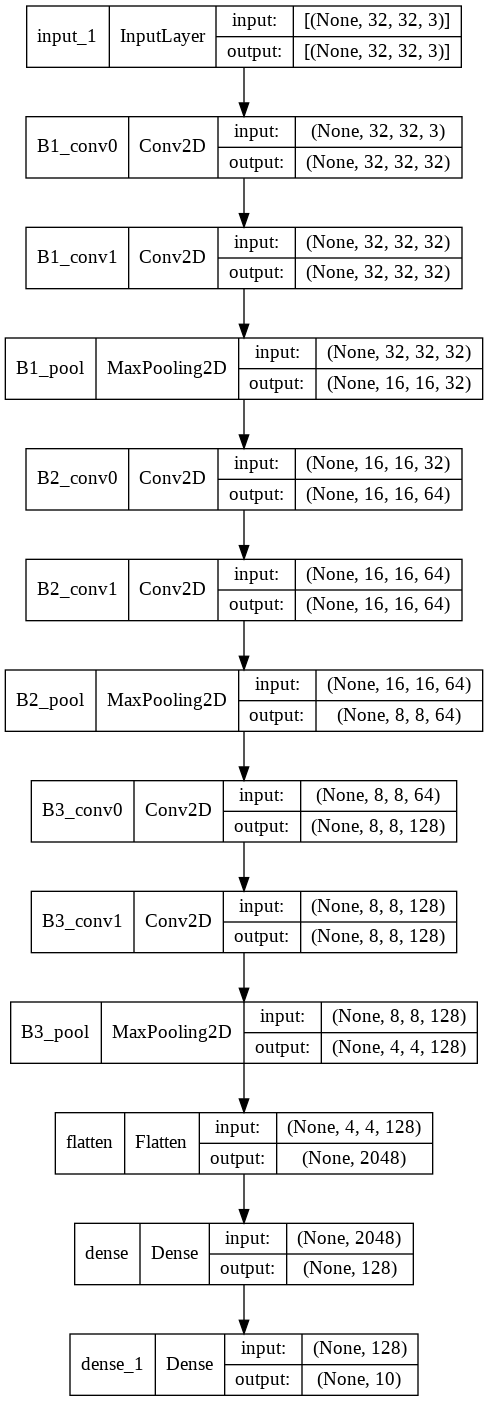

In [ ]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [ ]:
model.compile(
    loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])

In [ ]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,
    validation_split=0.2,batch_size=200,epochs=30,verbose=2)       

Epoch 1/30
200/200 - 14s - loss: 2.1564 - acc: 0.3232 - val_loss: 1.8285 - val_acc: 0.3951 - 14s/epoch - 68ms/step
Epoch 2/30
200/200 - 3s - loss: 1.7247 - acc: 0.4393 - val_loss: 1.6308 - val_acc: 0.4870 - 3s/epoch - 17ms/step
Epoch 3/30
200/200 - 3s - loss: 1.5529 - acc: 0.5096 - val_loss: 1.5016 - val_acc: 0.5256 - 3s/epoch - 17ms/step
Epoch 4/30
200/200 - 3s - loss: 1.4385 - acc: 0.5612 - val_loss: 1.4108 - val_acc: 0.5795 - 3s/epoch - 17ms/step
Epoch 5/30
200/200 - 3s - loss: 1.3441 - acc: 0.6039 - val_loss: 1.3219 - val_acc: 0.6145 - 3s/epoch - 17ms/step
Epoch 6/30
200/200 - 3s - loss: 1.2905 - acc: 0.6263 - val_loss: 1.2898 - val_acc: 0.6294 - 3s/epoch - 17ms/step
Epoch 7/30
200/200 - 3s - loss: 1.2383 - acc: 0.6508 - val_loss: 1.2047 - val_acc: 0.6637 - 3s/epoch - 17ms/step
Epoch 8/30
200/200 - 3s - loss: 1.1909 - acc: 0.6692 - val_loss: 1.2081 - val_acc: 0.6693 - 3s/epoch - 17ms/step
Epoch 9/30
200/200 - 3s - loss: 1.1670 - acc: 0.6827 - val_loss: 1.2234 - val_acc: 0.6651 - 3s

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

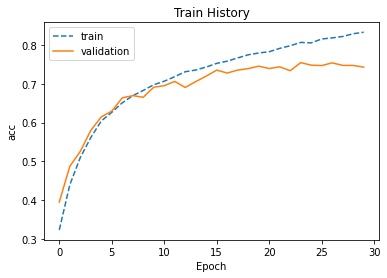

In [ ]:
show_train_history(train_history,'acc','val_acc')

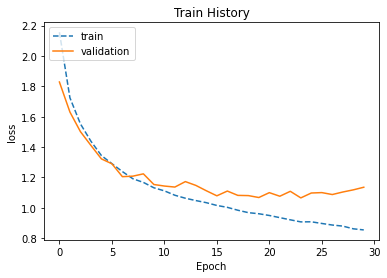

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2)

313/313 - 2s - loss: 1.1412 - acc: 0.7419 - 2s/epoch - 5ms/step


In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 1.1411901712417603 test_acc= 0.7419000267982483


# 進行預測

In [ ]:
probability = model.predict(x_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [ ]:
prediction

array([3, 8, 8, ..., 5, 1, 7])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
label_dict={
    0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
    5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

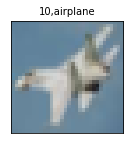

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,[],idx=10,num=1)

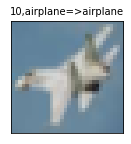

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=1)

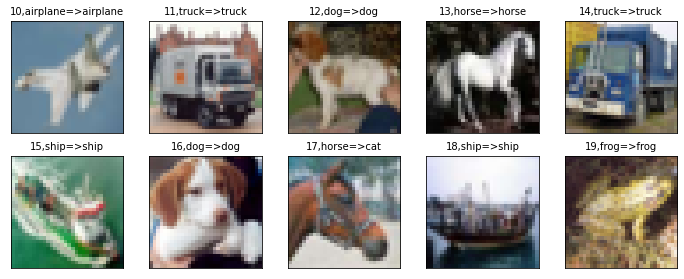

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=10)

# 查看預測機率

In [ ]:
def show_predicted_probability(
  images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

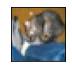

label: cat
predict: cat
airplane   Probability:0.000425093
automobile Probability:0.000191734
bird       Probability:0.001742672
cat        Probability:0.705452442
deer       Probability:0.000048608
dog        Probability:0.244693339
frog       Probability:0.000529354
horse      Probability:0.000365268
ship       Probability:0.045041684
truck      Probability:0.001509729


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,0) 

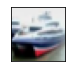

label: ship
predict: ship
airplane   Probability:0.000142153
automobile Probability:0.000320127
bird       Probability:0.000000346
cat        Probability:0.000001097
deer       Probability:0.000000010
dog        Probability:0.000000011
frog       Probability:0.000002474
horse      Probability:0.000000008
ship       Probability:0.999518752
truck      Probability:0.000015016


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1) 

# confusion matrix

In [ ]:
import pandas as pd

In [ ]:
cm=pd.crosstab(
    index=y_test_label,columns=prediction,
    rownames=['label'],colnames=['predict'])

In [ ]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,741,12,76,25,9,20,8,15,68,26
1,13,852,11,7,1,11,5,4,29,67
2,45,5,667,43,35,142,35,15,4,9
3,16,4,60,472,26,329,37,32,9,15
4,11,4,83,52,588,162,35,59,3,3
5,5,0,23,65,11,856,12,19,2,7
6,2,3,60,54,13,70,778,6,10,4
7,4,5,28,26,14,145,7,758,3,10
8,48,22,22,10,1,8,5,1,853,30


#heapmap cm

In [ ]:
import numpy as np

In [ ]:
cm_mat=cm.to_numpy()

In [ ]:
cm_mat

array([[741,  12,  76,  25,   9,  20,   8,  15,  68,  26],
       [ 13, 852,  11,   7,   1,  11,   5,   4,  29,  67],
       [ 45,   5, 667,  43,  35, 142,  35,  15,   4,   9],
       [ 16,   4,  60, 472,  26, 329,  37,  32,   9,  15],
       [ 11,   4,  83,  52, 588, 162,  35,  59,   3,   3],
       [  5,   0,  23,  65,  11, 856,  12,  19,   2,   7],
       [  2,   3,  60,  54,  13,  70, 778,   6,  10,   4],
       [  4,   5,  28,  26,  14, 145,   7, 758,   3,  10],
       [ 48,  22,  22,  10,   1,   8,   5,   1, 853,  30],
       [ 25,  54,  11,  10,   1,  13,   3,  12,  17, 854]])

In [ ]:
cm_mat.sum(axis=0)

array([ 910,  961, 1041,  764,  699, 1756,  925,  921,  998, 1025])

In [ ]:
cm_mat.sum(axis=1)[:, np.newaxis]

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]])

In [ ]:
cm_norm = np.around(
    cm_mat.astype('float') / 
    cm_mat.sum(axis=1)[:, np.newaxis], 
    decimals=3)

In [ ]:
cm_norm 

array([[0.741, 0.012, 0.076, 0.025, 0.009, 0.02 , 0.008, 0.015, 0.068,
        0.026],
       [0.013, 0.852, 0.011, 0.007, 0.001, 0.011, 0.005, 0.004, 0.029,
        0.067],
       [0.045, 0.005, 0.667, 0.043, 0.035, 0.142, 0.035, 0.015, 0.004,
        0.009],
       [0.016, 0.004, 0.06 , 0.472, 0.026, 0.329, 0.037, 0.032, 0.009,
        0.015],
       [0.011, 0.004, 0.083, 0.052, 0.588, 0.162, 0.035, 0.059, 0.003,
        0.003],
       [0.005, 0.   , 0.023, 0.065, 0.011, 0.856, 0.012, 0.019, 0.002,
        0.007],
       [0.002, 0.003, 0.06 , 0.054, 0.013, 0.07 , 0.778, 0.006, 0.01 ,
        0.004],
       [0.004, 0.005, 0.028, 0.026, 0.014, 0.145, 0.007, 0.758, 0.003,
        0.01 ],
       [0.048, 0.022, 0.022, 0.01 , 0.001, 0.008, 0.005, 0.001, 0.853,
        0.03 ],
       [0.025, 0.054, 0.011, 0.01 , 0.001, 0.013, 0.003, 0.012, 0.017,
        0.854]])

In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]
cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)

In [ ]:
cm_df

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,0.741,0.012,0.076,0.025,0.009,0.020,0.008,0.015,0.068,0.026
automobile,0.013,0.852,0.011,0.007,0.001,0.011,0.005,0.004,0.029,0.067
bird,0.045,0.005,0.667,0.043,0.035,0.142,0.035,0.015,0.004,0.009
cat,0.016,0.004,0.060,0.472,0.026,0.329,0.037,0.032,0.009,0.015
deer,0.011,0.004,0.083,0.052,0.588,0.162,0.035,0.059,0.003,0.003
dog,0.005,0.000,0.023,0.065,0.011,0.856,0.012,0.019,0.002,0.007
frog,0.002,0.003,0.060,0.054,0.013,0.070,0.778,0.006,0.010,0.004
horse,0.004,0.005,0.028,0.026,0.014,0.145,0.007,0.758,0.003,0.010
ship,0.048,0.022,0.022,0.010,0.001,0.008,0.005,0.001,0.853,0.030
truck,0.025,0.054,0.011,0.010,0.001,0.013,0.003,0.012,0.017,0.854


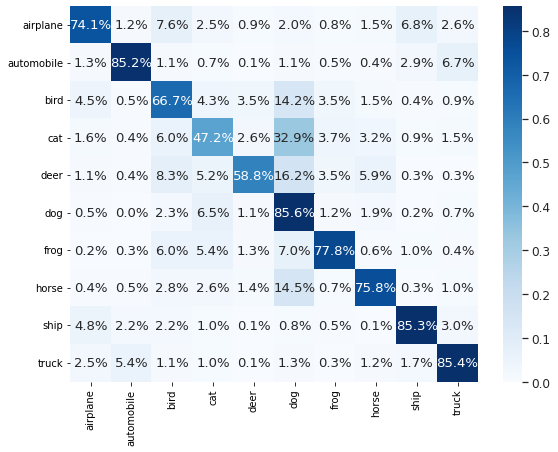

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 6))
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
plt.show()

#heatmap_confusion_matrix

In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

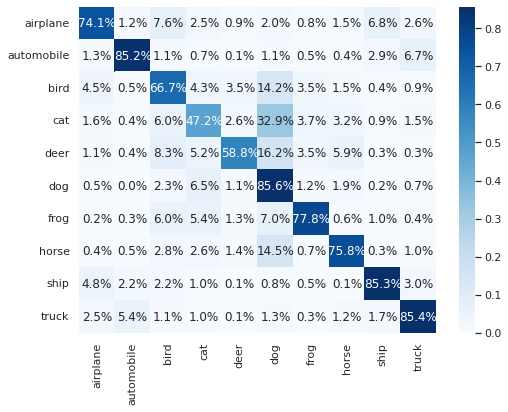

In [ ]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

In [ ]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [ ]:
df[:5]

,label,predict
0,3,3
1,8,8
2,8,8
3,0,8
4,6,6


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
158,5,3
321,5,3
421,5,3
518,5,3
925,5,3
...,...,...
9269,5,3
9380,5,3
9657,5,3
9928,5,3


# 查看預測錯誤資料

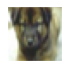

label: dog
predict: dog
airplane   Probability:0.000003506
automobile Probability:0.000772685
bird       Probability:0.036456019
cat        Probability:0.115878358
deer       Probability:0.013566632
dog        Probability:0.494614005
frog       Probability:0.335809141
horse      Probability:0.000272687
ship       Probability:0.000678009
truck      Probability:0.001948927


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,33)

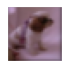

label: dog
predict: dog
airplane   Probability:0.000332443
automobile Probability:0.000003196
bird       Probability:0.004382618
cat        Probability:0.397397190
deer       Probability:0.000621624
dog        Probability:0.595627487
frog       Probability:0.000321300
horse      Probability:0.001267078
ship       Probability:0.000013056
truck      Probability:0.000033923


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,178)